In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sw_plotting import change_bar_width, plotCountBar
from sw_utilities import tukeyTest

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


In [2]:
# Bud count data for single bud culture from dissected E13 SMG epithelial rudiments

df = pd.read_csv('../data/SMG-bud-count-single-bud-single-cell-culture/20200917-E13epi-K14-RFP-single-bud-zStack-day1-budCount.txt')
df.columns = ['file_name', 'bud_count']
df['time'] = ['day1'] * len(df)
df1 = df

df = pd.read_csv('../data/SMG-bud-count-single-bud-single-cell-culture/20200918-E13epi-K14-RFP-single-bud-zStack-day2-budCount.txt')
df.columns = ['file_name', 'bud_count']
df['time'] = ['day2'] * len(df)
df2 = df

df = pd.concat([df1, df2])
# df.head()

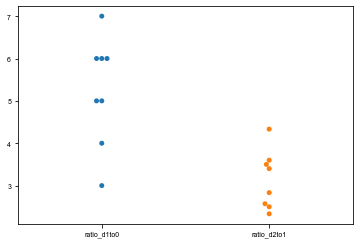

In [3]:
# calculate bud count ratios
# day 0, all bud count is 1, so ratio is the say as day 1 counts
ratio_d1to0 = df[df.time=='day1']['bud_count'].values
ratio_d2to1 = df[df.time=='day2']['bud_count'].values / df[df.time=='day1']['bud_count'].values

# annoate ratios with group id
ratios = ratio_d1to0.tolist() + ratio_d2to1.tolist()
groups = ['ratio_d1to0']*len(ratio_d1to0) + ['ratio_d2to1']*len(ratio_d2to1)

# quick visulization
sns.swarmplot(groups, ratios)

# temporary storage variables
ratios1 = ratios
groups1 = groups

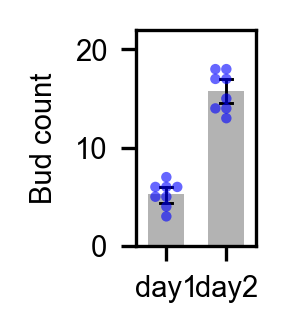

In [4]:
# Raw bud count plotting

outputPrefix = '20200916-18-SMG-single-bud-culture-bud-count'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=0.5
fig_height=0.9
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax = sns.swarmplot(x='time', y='bud_count', data=df,
                   color="blue", size=2.5, alpha=.6)

ax = sns.barplot(x='time', y='bud_count', data=df,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci=95)

plt.ylim(0, 22)
plt.yticks([0, 10, 20])

plt.xlabel(None)
plt.ylabel("Bud count")

# make the bar width narrower
change_bar_width(ax, .6)

# ax.set_xticklabels(labels=plot_order, rotation=45, ha="right")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


In [5]:
# Bud count data for single cell culture from dissected E13 SMG epithelial rudiments

df = pd.read_csv('../data/SMG-bud-count-single-bud-single-cell-culture/20200919-E13epi-K14-RFP-single-cell-unsorted-zStack-day1-budCount.txt')
df.columns = ['file_name', 'bud_count']
df['time'] = ['day1'] * len(df)
df1 = df

df = pd.read_csv('../data/SMG-bud-count-single-bud-single-cell-culture/20200920-E13epi-K14-RFP-single-cell-unsorted-zStack-day2-budCount.txt')
df.columns = ['file_name', 'bud_count']
df['time'] = ['day2'] * len(df)
df2 = df

df = pd.concat([df1, df2])
# df.head()

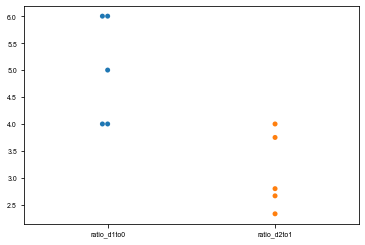

In [6]:
# calculate bud count ratios
# day 0, all bud count is 1, so ratio is the say as day 1 counts
ratio_d1to0 = df[df.time=='day1']['bud_count'].values
ratio_d2to1 = df[df.time=='day2']['bud_count'].values / df[df.time=='day1']['bud_count'].values

# annoate ratios with group id
ratios = ratio_d1to0.tolist() + ratio_d2to1.tolist()
groups = ['ratio_d1to0']*len(ratio_d1to0) + ['ratio_d2to1']*len(ratio_d2to1)

# quick visulization
sns.swarmplot(groups, ratios)

# temporary storage variables
ratios2 = ratios
groups2 = groups

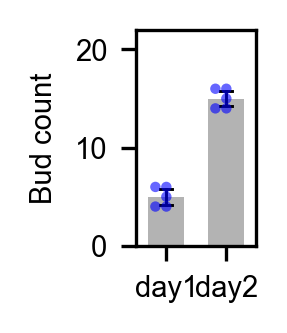

In [7]:
outputPrefix = '20200916-18-SMG-single-cell-culture-bud-count'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=0.5
fig_height=0.9
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax = sns.swarmplot(x='time', y='bud_count', data=df,
                   color="blue", size=2.5, alpha=.6)

ax = sns.barplot(x='time', y='bud_count', data=df,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci=95)

plt.ylim(0, 22)
plt.yticks([0, 10, 20])

plt.xlabel(None)
plt.ylabel("Bud count")

# make the bar width narrower
change_bar_width(ax, .6)

# ax.set_xticklabels(labels=plot_order, rotation=45, ha="right")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


In [8]:
# Bud count data for intact culture for direct comparison

df = pd.read_csv('../data/SMG-bud-count-single-bud-single-cell-culture/20210128-30-SMG-intact-culture-for-comparison-4104-budCount.txt', sep='\t')
df.columns = ['file_name', 'bud_count']

# annotate experimental groups
# group 1: day 0 from ~E13 stage (13 total)
#          6 glands from 1 mouse and 7 glands from another
# group 2: day 0 from ~E12 stage (9 total)
#          5 glands from 1 mouse and 4 glands from another
# groups 3-4: above glands in order, day 1
# groups 5-6: above glands in order, day 2

df['initial_stage'] = ['E13'] * 13 + ['E12'] * 9 + ['E13'] * 13 + ['E12'] * 9 + ['E13'] * 13 + ['E12'] * 9
df['time'] = ['day0'] * 22 + ['day1'] * 22 + ['day2'] * 22
df['group'] = ['E13_d0'] * 13 + ['E12_d0'] * 9 + ['E13_d1'] * 13 + ['E12_d1'] * 9 + ['E13_d2'] * 13 + ['E12_d2'] * 9

# seperate out the 2 groups from different initial stage
df_E13 = df[df.initial_stage=='E13']
df_E12 = df[df.initial_stage=='E12']

df.head()

,file_name,bud_count,initial_stage,time,group
0,20210128-mouse1-1-E13-001.nd2,6,E13,day0,E13_d0
1,20210128-mouse1-1-E13-002.nd2,3,E13,day0,E13_d0
2,20210128-mouse1-1-E13-003.nd2,5,E13,day0,E13_d0
3,20210128-mouse1-1-E13-004.nd2,5,E13,day0,E13_d0
4,20210128-mouse1-1-E13-005.nd2,5,E13,day0,E13_d0


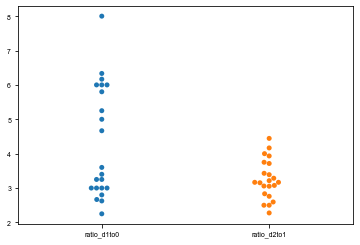

In [9]:
# calculate bud count ratios
ratio_d1to0 = df[df.time=='day1']['bud_count'].values / df[df.time=='day0']['bud_count'].values
ratio_d2to1 = df[df.time=='day2']['bud_count'].values / df[df.time=='day1']['bud_count'].values

# annoate ratios with group id
ratios = ratio_d1to0.tolist() + ratio_d2to1.tolist()
groups = ['ratio_d1to0']*len(ratio_d1to0) + ['ratio_d2to1']*len(ratio_d2to1)

# quick visulization
sns.swarmplot(groups, ratios)

# temporary storage variables
ratios3 = ratios
groups3 = groups

<AxesSubplot:>

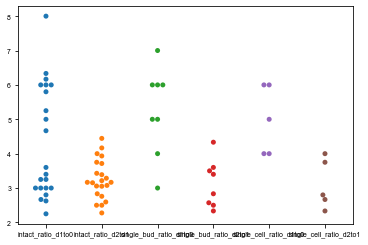

In [10]:
# concatenate all
ratios_all = ratios3 + ratios1 + ratios2
groups_all = groups3 + groups1 + groups2
experiment_groups = ['intact']*len(ratios3) + ['single_bud']*len(ratios1) + ['single_cell']*len(ratios2)
group_id = [experiment_groups[i] + '_' + groups_all[i] for i in range(len(groups_all))]
# quick visulization
sns.swarmplot(group_id, ratios_all)

In [11]:
tukeyTest(ratios_all, group_id)

Summary of test:
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------
     intact_ratio_d1to0      intact_ratio_d2to1  -1.0724 0.0319 -2.0854 -0.0594   True
     intact_ratio_d1to0  single_bud_ratio_d1to0   0.9292 0.3729 -0.4579  2.3163  False
     intact_ratio_d1to0  single_bud_ratio_d2to1  -1.1869 0.1352  -2.574  0.2002  False
     intact_ratio_d1to0 single_cell_ratio_d1to0   0.6792 0.8154 -0.9853  2.3437  False
     intact_ratio_d1to0 single_cell_ratio_d2to1  -1.2108  0.282 -2.8753  0.4537  False
     intact_ratio_d2to1  single_bud_ratio_d1to0   2.0016  0.001  0.6145  3.3886   True
     intact_ratio_d2to1  single_bud_ratio_d2to1  -0.1145    0.9 -1.5016  1.2726  False
     intact_ratio_d2to1 single_cell_ratio_d1to0   1.7516 0.0335  0.0871  3.4161   True
     intact_ratio_d2to1 s

In [12]:
pd.unique(group_id)

array(['intact_ratio_d1to0', 'intact_ratio_d2to1',
       'single_bud_ratio_d1to0', 'single_bud_ratio_d2to1',
       'single_cell_ratio_d1to0', 'single_cell_ratio_d2to1'], dtype=object)

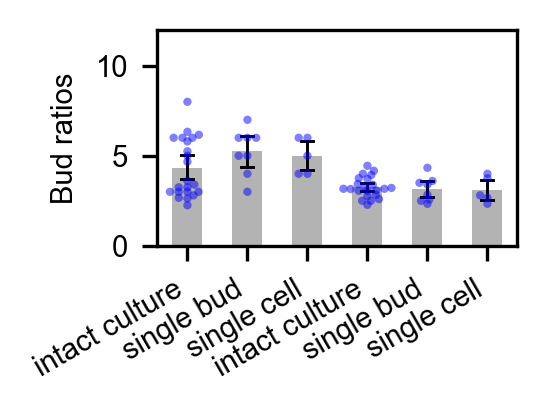

In [13]:
outputPrefix = 'SMG-intact-single-bud-single-cell-bud-ratios'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=1.5
fig_height=0.9
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

plotting_order = ['intact_ratio_d1to0', 'single_bud_ratio_d1to0', 'single_cell_ratio_d1to0',
                  'intact_ratio_d2to1', 'single_bud_ratio_d2to1', 'single_cell_ratio_d2to1']

ax = sns.swarmplot(x=group_id, y=ratios_all,
                   order=plotting_order,
                   color="blue", size=2.0, alpha=.5)

ax = sns.barplot(x=group_id, y=ratios_all,
                 order=plotting_order,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci=95)

plt.ylim(0, 12)
# plt.yticks([0, 5, 10])

plt.xlabel(None)
plt.ylabel("Bud ratios")

# make the bar width narrower
change_bar_width(ax, .5)

# rotate x tick labels if necessary
# x_labels = ax.get_xticklabels()
x_labels = ['intact culture', 'single bud', 'single cell',
            'intact culture', 'single bud', 'single cell']
ax.set_xticklabels(labels=x_labels, rotation=30, ha="right")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


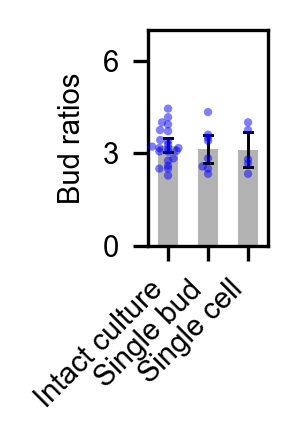

In [14]:
outputPrefix = 'SMG-intact-single-bud-single-cell-bud-ratios-only-day2-to-1'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=0.5
fig_height=0.9
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

plotting_order = ['intact_ratio_d2to1',
                  'single_bud_ratio_d2to1',
                  'single_cell_ratio_d2to1']

ax = sns.swarmplot(x=group_id, y=ratios_all,
                   order=plotting_order,
                   color="blue", size=2.0, alpha=.5)

ax = sns.barplot(x=group_id, y=ratios_all,
                 order=plotting_order,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci=95)

plt.ylim(0, 7)
plt.yticks([0, 3, 6])

plt.xlabel(None)
plt.ylabel("Bud ratios")

# make the bar width narrower
change_bar_width(ax, .5)

# rotate x tick labels if necessary
# x_labels = ax.get_xticklabels()
x_labels = ['Intact culture', 'Single bud', 'Single cell']
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)
